In [29]:
from sketching import settings
from sketching.datasets import Dataset, Covertype_Sklearn, KDDCup_Sklearn, Webspam_libsvm, Synthetic_Dataset, NoisyDataset, Synthetic_Dataset_Cohen 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from os.path import exists

In [30]:
if not settings.PLOTS_DIR.exists():
    settings.PLOTS_DIR.mkdir()

In [31]:
def get_results_df(dataset: Dataset):
    df_list = []
    for method in ["turnstile", "leverage", "cosketching1", "cosketching2", "cosketching5", "cosketching10"]:#, "cosketching20"]:
    #for method in ["uniform", "l2s", "sketching", "sketching1", "sketching2", "sketching3", "sketching4"]:
    #for method in ["uniform", "l2s", "sketching1", "sketching2", "sketching3", "sketching4", "sketching5", "sketching6", "sketching7", "sketching8"]:
    #for method in ["uniform", "l2s", "sketching1", "sketching2", "sketching3", "sketching4", "sketching5", "sketching6", "sketching7", "sketching8", "sketching9", "sketching10", "sketching11", "sketching12", "sketching13", "sketching14", "sketching15", "sketching16"]:
        filename = settings.RESULTS_DIR / (dataset.get_name() + f"_{method}.csv")
        if exists(filename):
            df = (
                pd.read_csv(filename)
                .filter(items=["ratio", "size"])
                .groupby(["size"], as_index=False)
                .median()
                .assign(method=method)
            )
            df_list.append(df)

    filename = settings.RESULTS_DIR / (dataset.get_name() + f"_sgd.csv")
    if exists(filename):
        df_sgd = (
            pd.read_csv(filename)
            .filter(items=["ratio"])
            .assign(method="sgd", size=np.nan)
            .groupby(["method"], as_index=False)
            .median()
        )
        df_list.append(df_sgd)

    filename = settings.RESULTS_DIR / (dataset.get_name() + f"_cauchy.csv")
    if exists(filename):
        df = (
                pd.read_csv(filename)
                .filter(items=["ratio", "size"])
                .groupby(["size"], as_index=False)
                .median()
                .assign(method="cauchy")
            )
        df_list.append(df)

    return(pd.concat(df_list, ignore_index=True))

In [32]:
def make_plot(dataset, x_min, x_max, y_min, y_max, font_size=15, font_size_title=23, scale_log=False):
    results_df = get_results_df(dataset)

    # use TeX for typesetting
    plt.rcParams["text.usetex"] = True
    plt.rc("font", size=font_size)

    fig, ax = plt.subplots()

    colormap = matplotlib.cm.get_cmap(name="tab10")
    colors = {
        "cauchy": colormap(3),
        "leverage": colormap(3),
        "turnstile": colormap(1),
        #"uniform": colormap(0),
        "cosketching1": colormap(3),
        "cosketching2": colormap(0),
        "cosketching5": colormap(1),
        "cosketching10": colormap(2),
        #"cosketching20": colormap(1),
        #"sketching5": colormap(7),
        #"sketching6": colormap(8),
        #"sketching7": colormap(9),
        #"sketching8": colormap(10),
        #"sketching9": colormap(11),
        #"sketching10": colormap(15),
        #"sketching11": colormap(12),
        #"sketching12": colormap(13),
        #"sketching13": colormap(14),
        #"sketching14": colormap(16),
        #"sketching15": colormap(17),
        #"sketching16": colormap(18),
        #"l2s": colormap(4),
    }

    labels = {
        "cauchy": "Cauchy",
        "leverage": "Leverage",
        "turnstile": "Turnstile",
        #"uniform": "Uniform",
        "cosketching1": "Sketch (old)",
        "cosketching2": "Sketch2",
        "cosketching5": "Sketch5",
        "cosketching10": "Sketch10",
        #"cosketching20": "Sketch20",
        #"sketching5": "Sketch5",
        #"sketching6": "Sketch6",
        #"sketching7": "Sketch7",
        #"sketching8": "Sketch8",
        #"sketching9": "Sketch9",
        #"sketching10": "Sketch10",
        #"sketching11": "Sketch11",
        #"sketching12": "Sketch12",
        #"sketching13": "Sketch13",
        #"sketching14": "Sketch14",
        #"sketching15": "Sketch15",
        #"sketching16": "Sketch16",
        #"l2s": "l2s"
        "sgd": "SGD"
    }

    titles = {
        "covertype_sklearn": "Covertype",
        "covertype_sklearn_noisy": "Covertype, 1\% noisy",
        "kddcup_sklearn": "Kddcup",
        "kddcup_sklearn_noisy": "Kddcup, 1\% noisy",
        "webspam_libsvm_desparsed": "Webspam",
        "webspam_libsvm_desparsed_noisy": "Webspam, 1\% noisy",
        "synthetic_n_100000": "Synthetic",
        "synthetic_n_100000_d_200": "Syntheticcohen",
        "synthetic_n_10000_d_100": "Syntheticcohen",
        "synthetic_n_50000_d_400": "Syntheticcohen",
        "synthetic_n_1000_d_20": "Syntheticcohen",
        "synthetic_n_20000_d_15": "Syntheticcohen",
        "synthetic_n_20000_d_100": "Synthetic data"
    }

    if scale_log:
        ax.set_yscale("log")
        
    if exists(settings.RESULTS_DIR / (dataset.get_name() + f"_sgd.csv")):
        # add SGD
        median_sgd = results_df.loc[results_df["method"] == "sgd"]["ratio"]
        ax.plot([x_min, x_max], [median_sgd, median_sgd], label="SGD", color=colormap(7))

    #for cur_method in ["uniform", "sketching1", "sketching2", "sketching3", "sketching4", "l2s"]:
    #for cur_method in ["uniform", "sketching5", "sketching6", "sketching7", "sketching8", "l2s"]:
    #for cur_method in ["uniform", "sketching9", "sketching10", "sketching11", "sketching12", "l2s"]:
    #for cur_method in ["uniform", "sketching13", "sketching14", "sketching15", "sketching16", "l2s"]:
    #for cur_method in ["cauchy", "cosketching1", "cosketching2", "cosketching5", "cosketching10"]:
    #for cur_method in ["cauchy", "cosketching2", "cosketching5", "cosketching10"]:
    for cur_method in ["turnstile", "leverage", "cosketching2"]:
        cur_results = results_df.loc[results_df["method"] == cur_method]
        ax.plot(
            cur_results["size"], 
            cur_results["ratio"],
            color=colors[cur_method],
            label=labels[cur_method],
        )

    ax.set_xlim(left=x_min, right=x_max)
    ax.set_ylim(bottom=y_min, top=y_max)

    ax.set_xlabel("reduced size")
    ax.set_ylabel("median approximation ratio")

    #ax.set_title(titles[dataset.get_name()], fontsize=font_size_title)
    ax.set_title(titles[dataset.get_name()], fontsize=font_size_title)

    legend = ax.legend(loc="upper right", frameon=True)

    fig.tight_layout()

    plt.savefig(settings.PLOTS_DIR / f"{dataset.get_name()}_ratio_plot.pdf")

    plt.show()

In [ ]:
dataset = Synthetic_Dataset_Cohen(20000, 100)
make_plot(dataset, x_min=1000, x_max=4000, y_min=1, y_max=20000, scale_log=True)

C:\Users\Traitor\AppData\Local\Temp\ipykernel_17148\2899700079.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(name="tab10")


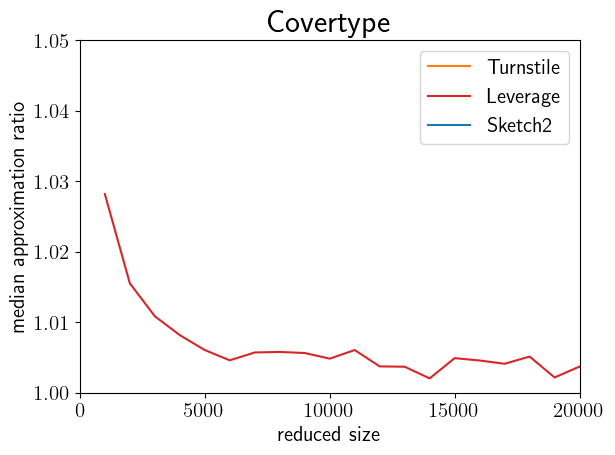

In [29]:
dataset = Covertype_Sklearn()
make_plot(dataset, x_min=0, x_max=20000, y_min=1, y_max=1.05)

C:\Users\Traitor\AppData\Local\Temp\ipykernel_10168\2899700079.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(name="tab10")


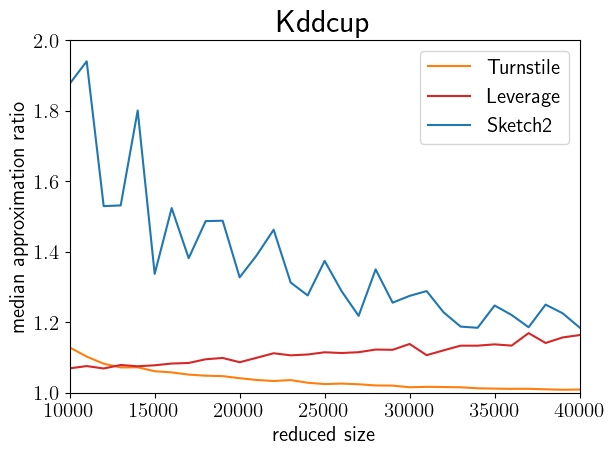

In [33]:
dataset = KDDCup_Sklearn()
make_plot(dataset, x_min=10000, x_max=40000, y_min=1, y_max=2)

In [ ]:
dataset = Webspam_libsvm()
make_plot(dataset, x_min=0, x_max=15000, y_min=1, y_max=2)

In [ ]:
dataset = Synthetic_Dataset(n_rows=100000)
make_plot(dataset, x_min=0, x_max=3000, y_min=1, y_max=1.01)

In [ ]:
dataset = NoisyDataset(dataset=Webspam_libsvm(), percentage=0.01, std=10)
make_plot(dataset, x_min=500, x_max=15000, y_min=1, y_max=20)

In [ ]:
dataset = NoisyDataset(dataset=Covertype_Sklearn(), percentage=0.01, std=10)
make_plot(dataset, x_min=0, x_max=20000, y_min=1, y_max=5.1)

In [ ]:
dataset = NoisyDataset(dataset=KDDCup_Sklearn(), percentage=0.01, std=10)
make_plot(dataset, x_min=10000, x_max=40000, y_min=1, y_max=6)